## Airbnb NY 2019 ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
df = df[['host_id', 'host_name','neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

In [9]:
df = df.fillna(value=0)

### Média de preço do aluguel pelo airbnb ordenado por tipo de quarto e bairro em NY ###

In [10]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [11]:
df.groupby(['neighbourhood_group', 'room_type'])['price'].mean()

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        66.788344
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.327545
                     Private room        76.500099
                     Shared room         50.527845
Manhattan            Entire home/apt    249.239109
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

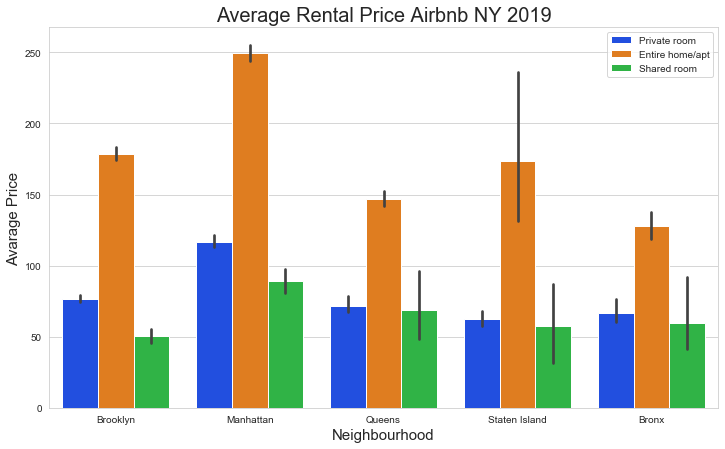

In [12]:
plt.figure(figsize=(12, 7))
sns.barplot(x='neighbourhood_group',y='price', hue='room_type', data=df,estimator=np.mean, palette='bright')
plt.title('Average Rental Price Airbnb NY 2019' ,fontdict={'fontsize': 20})
plt.ylabel('Avarage Price', fontdict={'fontsize': 15})
plt.xlabel('Neighbourhood', fontdict={'fontsize': 15})
plt.legend()
plt.show()

### Anfitriões com mais registros de locais disponíveis para aluguel ###

In [13]:
df.groupby('host_name')['host_id'].value_counts().sort_values(ascending=False).head()

host_name       host_id  
Sonder (NYC)    219517861    327
Blueground      107434423    232
Kara            30283594     121
Kazuya          137358866    103
Jeremy & Laura  16098958      96
Name: host_id, dtype: int64

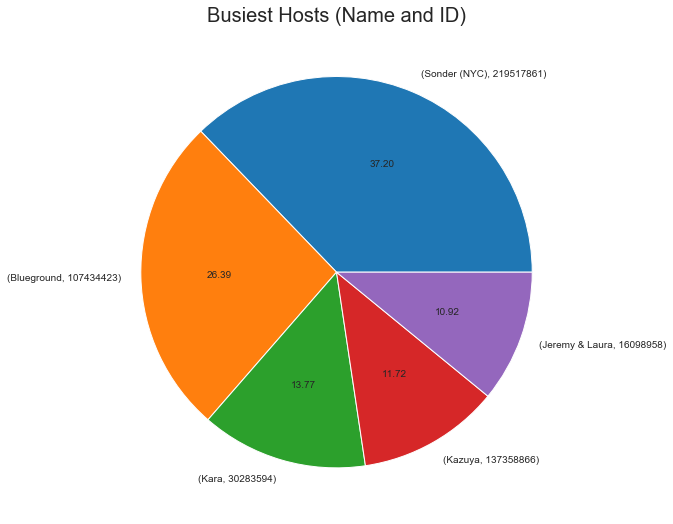

In [14]:
plt.figure(figsize=(15, 9))
df.groupby('host_name')['host_id'].value_counts().sort_values(ascending=False).head().plot.pie(autopct='%.2f')
plt.title('Busiest Hosts (Name and ID)' ,fontdict={'fontsize': 20})
plt.axis('off')
plt.show()

### Anfitriões mais populares(Com maior número de reviews registradas) ###

In [15]:
df.groupby(['host_name', 'host_id'])['number_of_reviews'].sum().sort_values(ascending=False).head()

host_name                       host_id 
Maya                            37312959    2273
Brooklyn&   Breakfast    -Len-  344035      2205
Danielle                        26432133    2017
Yasu & Akiko                    35524316    1971
Brady                           40176101    1818
Name: number_of_reviews, dtype: int64

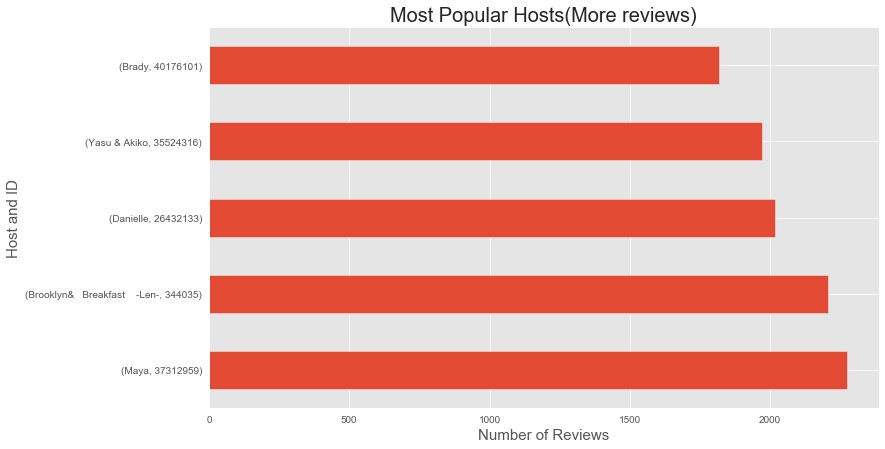

In [16]:
plt.figure(figsize=(12, 7))
plt.style.use('ggplot')
df.groupby(['host_name', 'host_id'])['number_of_reviews'].sum().sort_values(ascending=False).head().plot(kind='barh')
plt.title('Most Popular Hosts(More reviews)' ,fontdict={'fontsize': 20})
plt.ylabel('Host and ID', fontdict={'fontsize': 15})
plt.xlabel('Number of Reviews', fontdict={'fontsize': 15})
plt.show()

### Média de disponibilidade do quarto por bairro ###

In [23]:
df.groupby('neighbourhood_group')['availability_365'].mean()

neighbourhood_group
Bronx            165.758937
Brooklyn         100.232292
Manhattan        111.979410
Queens           144.451818
Staten Island    199.678284
Name: availability_365, dtype: float64

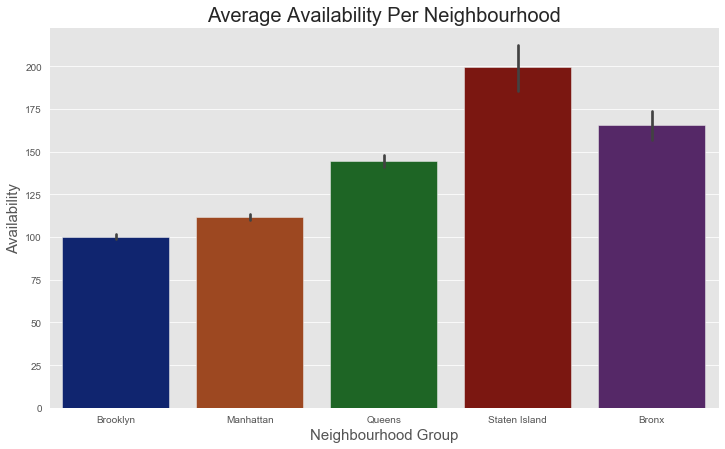

In [30]:
plt.figure(figsize=(12, 7))
sns.barplot(x='neighbourhood_group',y='availability_365', data=df,estimator=np.mean, palette='dark')
plt.title('Average Availability Per Neighbourhood' ,fontdict={'fontsize': 20})
plt.ylabel('Availability', fontdict={'fontsize': 15})
plt.xlabel('Neighbourhood Group', fontdict={'fontsize': 15})
plt.show()

### Mapas ###

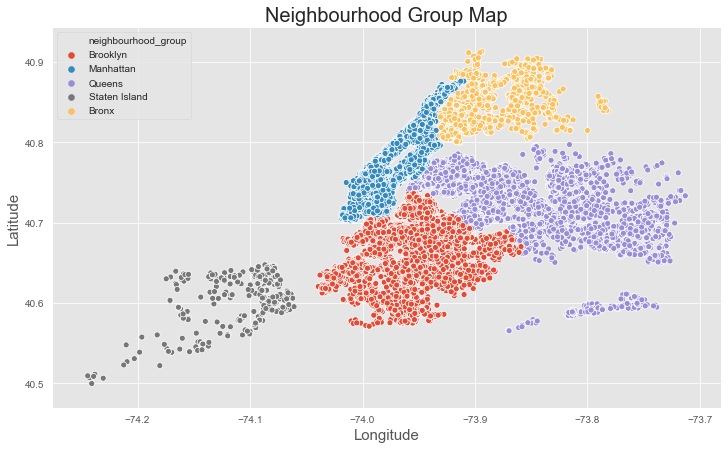

In [17]:
plt.figure(figsize=(12,7))
sns.scatterplot(df['longitude'],df['latitude'],hue=df['neighbourhood_group'])
plt.title('Neighbourhood Group Map', fontdict={'fontsize': 20})
plt.ylabel('Latitude', fontdict={'fontsize': 15})
plt.xlabel('Longitude', fontdict={'fontsize': 15})
plt.show()

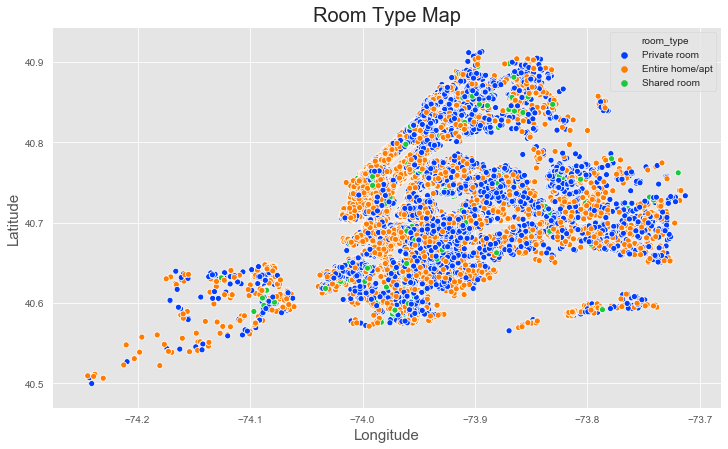

In [18]:
plt.figure(figsize=(12,7))
sns.scatterplot(df['longitude'],df['latitude'],hue=df['room_type'], palette='bright')
plt.title('Room Type Map', fontdict={'fontsize': 20})
plt.ylabel('Latitude', fontdict={'fontsize': 15})
plt.xlabel('Longitude', fontdict={'fontsize': 15})
plt.show()